# Adidas vs Nike - Detailed EDA & Advanced Analytics

Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression



Importing Data

In [2]:
data = pd.read_csv("/Users/harshjaiswal/Desktop/Kaggle /Adidas/Adidas Vs Nike.csv")

In [3]:
data

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15
...,...,...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13T15:41:01
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,2020-04-13T15:41:03
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,2020-04-13T15:41:07
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,2020-04-13T15:41:19


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Description    3265 non-null   object 
 7   Rating         3268 non-null   float64
 8   Reviews        3268 non-null   int64  
 9   Last Visited   3268 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 255.4+ KB


In [5]:
data.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,6868.020196,6134.265606,26.875765,3.242105,40.551714
std,4724.659386,4293.247581,22.633487,1.428856,31.543491
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4299.000000,2999.000000,0.000000,2.600000,10.000000
50%,5999.000000,4799.000000,40.000000,3.500000,37.000000
75%,8999.000000,7995.000000,50.000000,4.400000,68.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


In [6]:
data.isnull().sum()

Product Name     0
Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Description      3
Rating           0
Reviews          0
Last Visited     0
dtype: int64

In [7]:
data

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15
...,...,...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13T15:41:01
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,2020-04-13T15:41:03
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,2020-04-13T15:41:07
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,2020-04-13T15:41:19


In [8]:
data['Last Visited']=pd.to_datetime(data['Last Visited'])

In [9]:
data['Last Visited']

0      2020-04-13 15:06:14
1      2020-04-13 15:06:15
2      2020-04-13 15:06:15
3      2020-04-13 15:06:15
4      2020-04-13 15:06:15
               ...        
3263   2020-04-13 15:41:01
3264   2020-04-13 15:41:03
3265   2020-04-13 15:41:07
3266   2020-04-13 15:41:19
3267   2020-04-13 15:42:57
Name: Last Visited, Length: 3268, dtype: datetime64[ns]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Product Name   3268 non-null   object        
 1   Product ID     3268 non-null   object        
 2   Listing Price  3268 non-null   int64         
 3   Sale Price     3268 non-null   int64         
 4   Discount       3268 non-null   int64         
 5   Brand          3268 non-null   object        
 6   Description    3265 non-null   object        
 7   Rating         3268 non-null   float64       
 8   Reviews        3268 non-null   int64         
 9   Last Visited   3268 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 255.4+ KB


In [11]:
data['Year']=data['Last Visited'].dt.year

In [12]:
data['Month']=data['Last Visited'].dt.month

In [13]:
data

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,Year,Month
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13 15:06:14,2020,4
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13 15:06:15,2020,4
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13 15:06:15,2020,4
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13 15:06:15,2020,4
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13 15:06:15,2020,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13 15:41:01,2020,4
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,2020-04-13 15:41:03,2020,4
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,2020-04-13 15:41:07,2020,4
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,2020-04-13 15:41:19,2020,4


In [14]:
Copy_data=data.copy()

In [15]:
Copy_data.drop(['Last Visited'],axis=1,inplace=True)

In [16]:
Copy_data

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Year,Month
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020,4
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020,4
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020,4
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020,4
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020,4
...,...,...,...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020,4
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,2020,4
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,2020,4
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,2020,4


In [17]:
Copy_data.dtypes

Product Name      object
Product ID        object
Listing Price      int64
Sale Price         int64
Discount           int64
Brand             object
Description       object
Rating           float64
Reviews            int64
Year               int32
Month              int32
dtype: object

In [18]:
Copy_data.isnull().sum()

Product Name     0
Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Description      3
Rating           0
Reviews          0
Year             0
Month            0
dtype: int64

In [19]:
Copy_data['Description'].value_counts()

Description
A well cushioned shoe with a fresher look that will appeal to young runners. Features Mesh upper for maximum ventilation, lightstrike IMEVA midsole with visible adiprene providing protection from harmful impact forces and durable Rubber outsole for long-lasting wear.                                        15
Stylish and sleek adidas sandals for women are extremely lightweight. Adjustable straps enable optimal fit while the Synthetic upper and soft EVA footbed with fitted heel provide enhanced comfort. Rubber outsole with wet and dry traction pattern keeps you in control.                                        13
Aspire to greatness. These running shoes are made with an airy, lightweight mesh upper. The durable rubber outsole grips the pavement for added stability. A cushioned midsole brings comfort to each step.                                                                                                        11
Stylish and sleek adidas Hoist sandals for men. Adjustable

In [20]:
Copy_data.dropna(subset=['Description'],inplace=True)

In [21]:
Copy_data.isna().sum()

Product Name     0
Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Description      0
Rating           0
Reviews          0
Year             0
Month            0
dtype: int64

In [22]:
Copy_data['Brand'].value_counts()

Brand
Adidas CORE / NEO           1111
Adidas ORIGINALS             907
Nike                         640
Adidas SPORT PERFORMANCE     606
Adidas Adidas ORIGINALS        1
Name: count, dtype: int64

In [23]:
Copy_data['Brand'] = data['Brand'].str.extract('(Adidas|Nike)', expand=False)

In [24]:
Copy_data['Brand'].value_counts()

Brand
Adidas    2625
Nike       640
Name: count, dtype: int64

In [25]:
Copy_data = Copy_data[Copy_data['Brand'].isin(['Adidas', 'Nike'])]

In [26]:
Copy_data

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Year,Month
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas,Channeling the streamlined look of an '80s rac...,4.8,41,2020,4
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas,"A modern take on adidas sport heritage, tailor...",3.3,24,2020,4
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas,These adidas Puka slippers for women's come wi...,2.6,37,2020,4
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas,"Inspired by modern tech runners, these women's...",4.1,35,2020,4
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas,This design is inspired by vintage Taekwondo s...,3.5,72,2020,4
...,...,...,...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020,4
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,2020,4
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,2020,4
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,2020,4


In [27]:
Copy_data.drop_duplicates(inplace=True)

In [28]:
Copy_data['Rating'] = Copy_data['Rating'].replace(0, 0.1)


In [29]:
Copy_data['Price_to_Rating'] = Copy_data['Listing Price'] / Copy_data['Rating']

In [30]:
Copy_data

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Year,Month,Price_to_Rating
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas,Channeling the streamlined look of an '80s rac...,4.8,41,2020,4,3124.791667
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas,"A modern take on adidas sport heritage, tailor...",3.3,24,2020,4,2302.727273
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas,These adidas Puka slippers for women's come wi...,2.6,37,2020,4,384.230769
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas,"Inspired by modern tech runners, these women's...",4.1,35,2020,4,1707.073171
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas,This design is inspired by vintage Taekwondo s...,3.5,72,2020,4,2285.428571
...,...,...,...,...,...,...,...,...,...,...,...,...
3260,Nike Tiempo Legend 8 Academy TF,AT6100-606,0,6495,0,Nike,The Nike Tiempo Legend 8 Academy TF takes the ...,0.1,0,2020,4,0.000000
3262,Nike React Metcon AMP,CT9155-063,0,13995,0,Nike,The Nike React Metcon AMP takes the stability ...,3.0,1,2020,4,0.000000
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020,4,3199.000000
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,2020,4,0.000000


In [31]:
scaler = StandardScaler()
Copy_data['Price_to_Rating'] = scaler.fit_transform(Copy_data[['Price_to_Rating']])

In [32]:
Copy_data

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Year,Month,Price_to_Rating
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas,Channeling the streamlined look of an '80s rac...,4.8,41,2020,4,-0.133942
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas,"A modern take on adidas sport heritage, tailor...",3.3,24,2020,4,-0.175986
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas,These adidas Puka slippers for women's come wi...,2.6,37,2020,4,-0.274106
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas,"Inspired by modern tech runners, these women's...",4.1,35,2020,4,-0.206450
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas,This design is inspired by vintage Taekwondo s...,3.5,72,2020,4,-0.176870
...,...,...,...,...,...,...,...,...,...,...,...,...
3260,Nike Tiempo Legend 8 Academy TF,AT6100-606,0,6495,0,Nike,The Nike Tiempo Legend 8 Academy TF takes the ...,0.1,0,2020,4,-0.293757
3262,Nike React Metcon AMP,CT9155-063,0,13995,0,Nike,The Nike React Metcon AMP takes the stability ...,3.0,1,2020,4,-0.293757
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020,4,-0.130147
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,2020,4,-0.293757


In [33]:
summary_stats = Copy_data.groupby('Brand').agg({
    'Listing Price': ['mean', 'median'],
    'Sale Price': ['mean', 'median'],
    'Discount': 'mean',
    'Rating': 'mean',
    'Reviews': 'mean'
}).reset_index()

In [34]:
summary_stats

Brand Listing Price            Sale Price           Discount    Rating  \
                   mean  median          mean  median       mean      mean   
0  Adidas   7600.980952  6599.0   5135.004190  3999.0  33.459048  3.369143   
1    Nike   4138.106884     0.0  10237.048913  9995.0   0.000000  2.823188   

     Reviews  
        mean  
0  48.725714  
1   7.346014

Key Takeaways:
	1.	Adidas seems to focus on affordability, offering lower prices, higher discounts, and better ratings.
	2.	Nike positions itself as a premium brand, with higher prices, no discounts, and lower ratings.
	3.	The median listing price of ₹0 for Nike likely reflects missing or inaccurate data, which needs cleaning for a better analysis.

In [35]:
Copy_data[(Copy_data['Brand'] == 'Nike') & (Copy_data['Listing Price'] == 0)]

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Year,Month,Price_to_Rating
2625,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,Let your shoe game shimmer in the Nike Air For...,0.1,0,2020,4,-0.293757
2626,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,The legend lives on in the Nike Air Force 1 '0...,0.1,0,2020,4,-0.293757
2627,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,"Taking both height and craft to new levels, th...",0.1,0,2020,4,-0.293757
2628,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.1,0,2020,4,-0.293757
2629,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.1,0,2020,4,-0.293757
...,...,...,...,...,...,...,...,...,...,...,...,...
3254,Nike Mercurial Vapor 13 Club MG,AT7968-606,0,4995,0,Nike,The Nike Mercurial Vapor 13 Club MG wraps your...,0.1,0,2020,4,-0.293757
3257,Air Jordan 5 Retro,CD2722-001,0,15995,0,Nike,The Air Jordan 5 Retro for women gives a colou...,3.3,3,2020,4,-0.293757
3260,Nike Tiempo Legend 8 Academy TF,AT6100-606,0,6495,0,Nike,The Nike Tiempo Legend 8 Academy TF takes the ...,0.1,0,2020,4,-0.293757
3262,Nike React Metcon AMP,CT9155-063,0,13995,0,Nike,The Nike React Metcon AMP takes the stability ...,3.0,1,2020,4,-0.293757


In [36]:
data

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,Year,Month
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13 15:06:14,2020,4
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13 15:06:15,2020,4
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13 15:06:15,2020,4
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13 15:06:15,2020,4
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13 15:06:15,2020,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13 15:41:01,2020,4
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,2020-04-13 15:41:03,2020,4
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,2020-04-13 15:41:07,2020,4
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,2020-04-13 15:41:19,2020,4


Reason for this is since we can see that the listing price is zero but nike has a selling price which states that the data is skewd, but since nike has positioned itself as a premium brand it is most likely to have zero discount 

In [37]:

Copy_data.loc[(Copy_data['Brand'] == 'Nike') & (Copy_data['Listing Price'] == 0), 'Listing Price'] = \
    Copy_data.loc[(Copy_data['Brand'] == 'Nike') & (Copy_data['Listing Price'] == 0), 'Sale Price']

In [38]:
summary_stats = Copy_data.groupby('Brand').agg({
    'Listing Price': ['mean', 'median'],
    'Sale Price': ['mean', 'median'],
    'Discount': 'mean',
    'Rating': 'mean',
    'Reviews': 'mean'
}).reset_index()

In [39]:
summary_stats

Brand Listing Price             Sale Price           Discount    Rating  \
                   mean   median          mean  median       mean      mean   
0  Adidas   7600.980952   6599.0   5135.004190  3999.0  33.459048  3.369143   
1    Nike  11417.291667  10995.0  10237.048913  9995.0   0.000000  2.823188   

     Reviews  
        mean  
0  48.725714  
1   7.346014

In [40]:
# Load Dataset

# Data Cleaning
## Extract Brand Names (Adidas/Nike only)
data['Brand'] = data['Brand'].str.extract('(Adidas|Nike)', expand=False)

## Filter to include only Adidas and Nike
data = data[data['Brand'].isin(['Adidas', 'Nike'])]

## Drop duplicates and handle missing values
data.drop_duplicates(inplace=True)
data.dropna(subset=['Rating', 'Reviews', 'Listing Price', 'Discount'], inplace=True)

# Convert Data Types
data['Listing Price'] = pd.to_numeric(data['Listing Price'], errors='coerce')
data['Discount'] = pd.to_numeric(data['Discount'], errors='coerce')

# Feature Engineering
## Create a price-to-rating ratio feature
data['Price_to_Rating'] = data['Listing Price'] / data['Rating']

## Summary Statistics & Data Overview

In [41]:
# Summary Statistics
summary_stats = data.groupby('Brand').agg({
    'Listing Price': ['mean', 'median'],
    'Sale Price': ['mean', 'median'],
    'Discount': 'mean',
    'Rating': 'mean',
    'Reviews': 'mean'
}).reset_index()

summary_stats

Brand Listing Price            Sale Price           Discount    Rating  \
                   mean  median          mean  median       mean      mean   
0  Adidas   7600.980952  6599.0   5135.004190  3999.0  33.459048  3.366362   
1    Nike   3875.762053     0.0  10213.676516  9597.0   0.000000  2.734837   

     Reviews  
        mean  
0  48.725714  
1   7.181960

## Visualizations

In [42]:
sns.set_theme(style="whitegrid", palette="pastel")

/var/folders/g_/4y5h37m96h7gb1f4w331kclw0000gn/T/ipykernel_97458/2793492400.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Copy_data, x='Brand', y='Listing Price', palette=custom_colors)


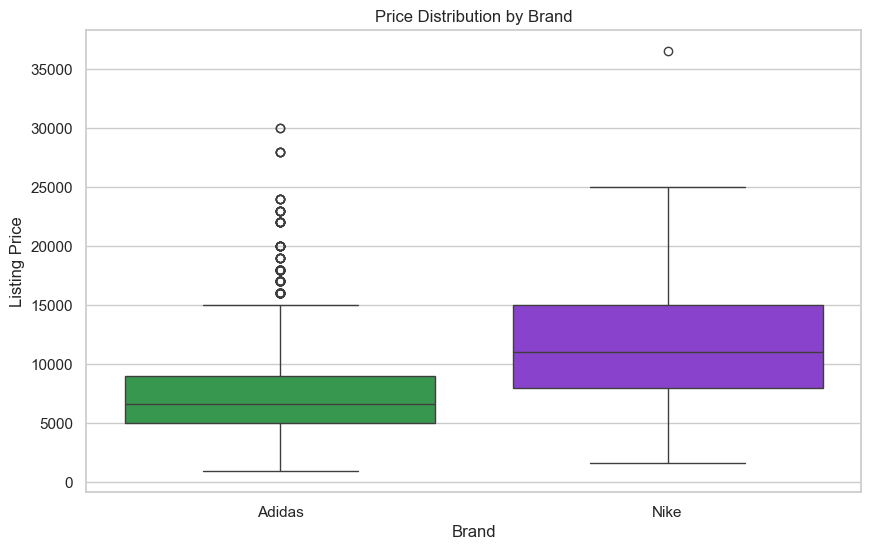

In [43]:

plt.figure(figsize=(10, 6))
custom_colors = ["#28A745", "#8A2BE2"]  # Green for Adidas, Purple for Nike
sns.boxplot(data=Copy_data, x='Brand', y='Listing Price', palette=custom_colors)
plt.title("Price Distribution by Brand")
plt.xlabel("Brand")
plt.ylabel("Listing Price")


plt.show();


/var/folders/g_/4y5h37m96h7gb1f4w331kclw0000gn/T/ipykernel_97458/659856063.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Copy_data, x='Brand', y='Rating', ax=axes[0], palette=custom_colors)
/var/folders/g_/4y5h37m96h7gb1f4w331kclw0000gn/T/ipykernel_97458/659856063.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Copy_data, x='Brand', y='Reviews', ax=axes[1], palette=custom_colors)


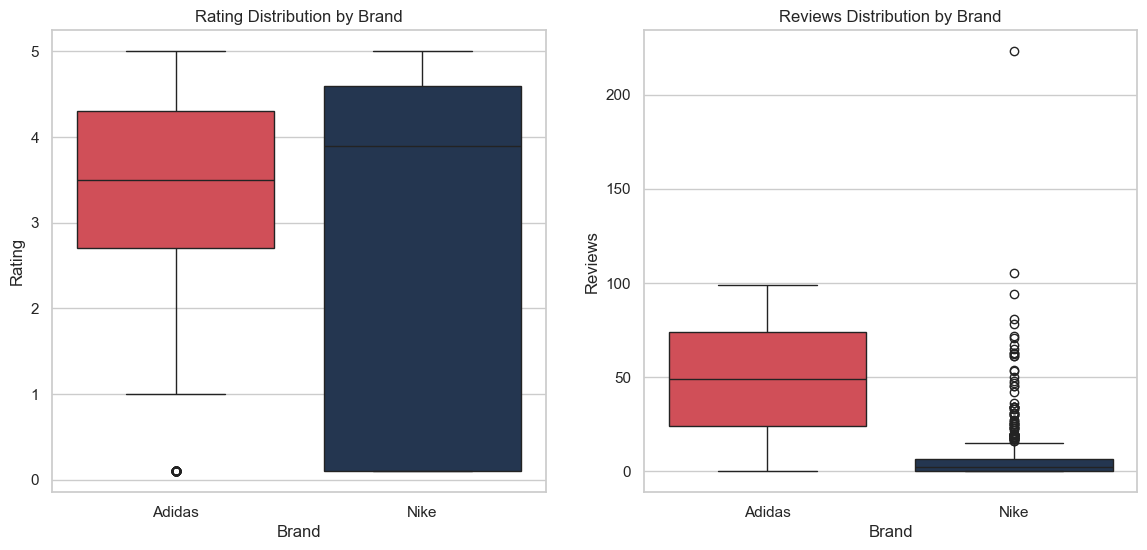

In [44]:

custom_colors = ["#E63946", "#1D3557"]  
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(data=Copy_data, x='Brand', y='Rating', ax=axes[0], palette=custom_colors)
axes[0].set_title("Rating Distribution by Brand")
sns.boxplot(data=Copy_data, x='Brand', y='Reviews', ax=axes[1], palette=custom_colors)
axes[1].set_title("Reviews Distribution by Brand")


plt.show()


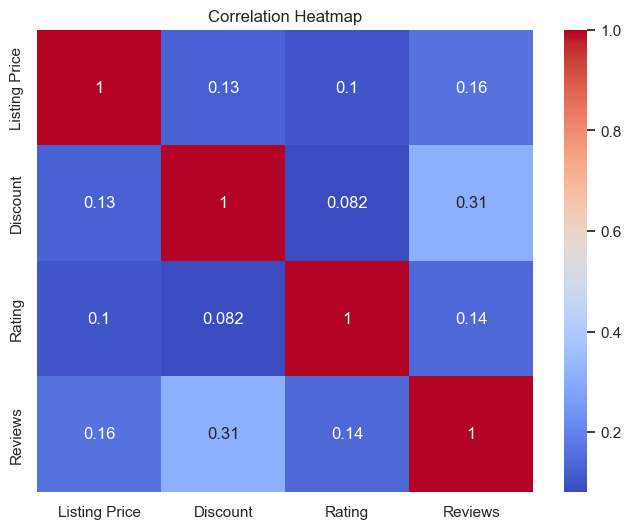

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Listing Price', 'Discount', 'Rating', 'Reviews']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

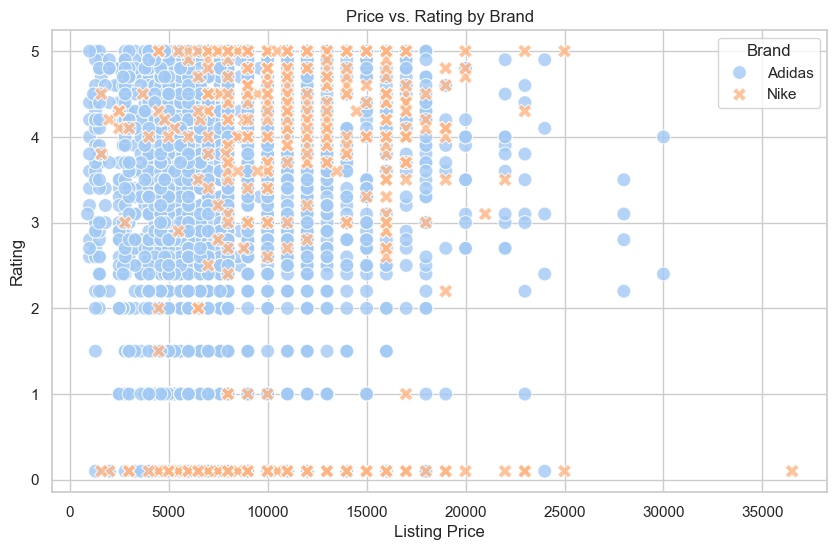

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Copy_data, x='Listing Price', y='Rating', hue='Brand', style='Brand', s=100, alpha=0.8, palette='pastel')
plt.title("Price vs. Rating by Brand")
plt.xlabel("Listing Price")
plt.ylabel("Rating")
plt.legend(title='Brand')
plt.show()

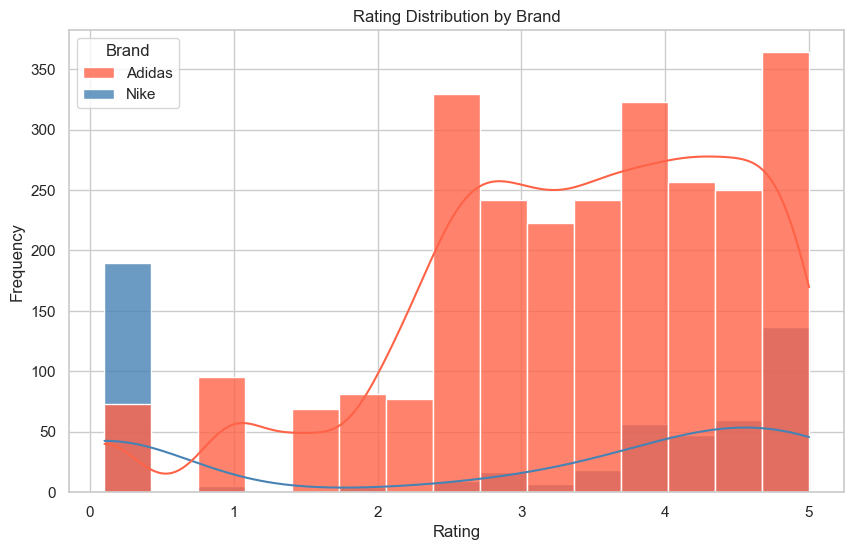

In [47]:
plt.figure(figsize=(10, 6))

contrasty_colors = ["#FF6347", "#4682B4"]  # Tomato for Adidas, Steel Blue for Nike
sns.histplot(data=Copy_data, x='Rating', hue='Brand', kde=True, palette=contrasty_colors, bins=15, alpha=0.8)
plt.title("Rating Distribution by Brand")
plt.xlabel("Rating")
plt.ylabel("Frequency")

plt.show()

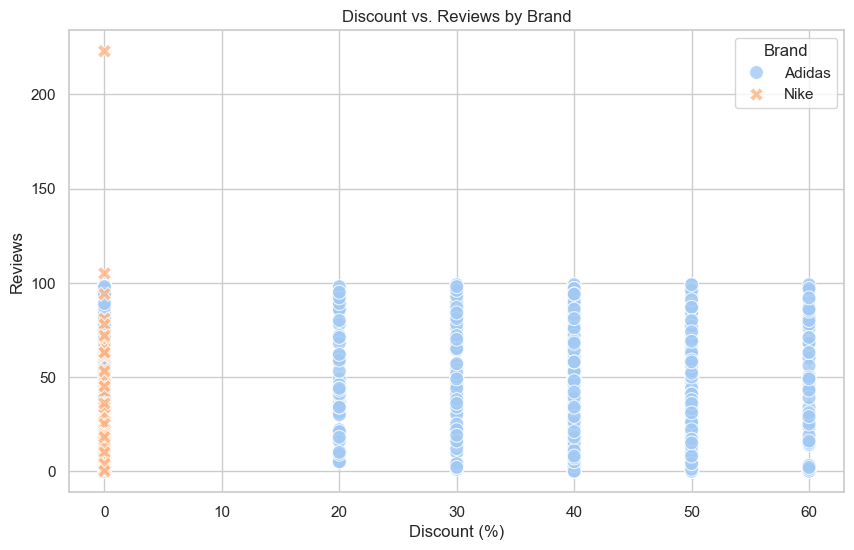

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Copy_data, x='Discount', y='Reviews', hue='Brand', style='Brand', s=100, alpha=0.8, palette='pastel')
plt.title("Discount vs. Reviews by Brand")
plt.xlabel("Discount (%)")
plt.ylabel("Reviews")
plt.legend(title='Brand')
plt.show()

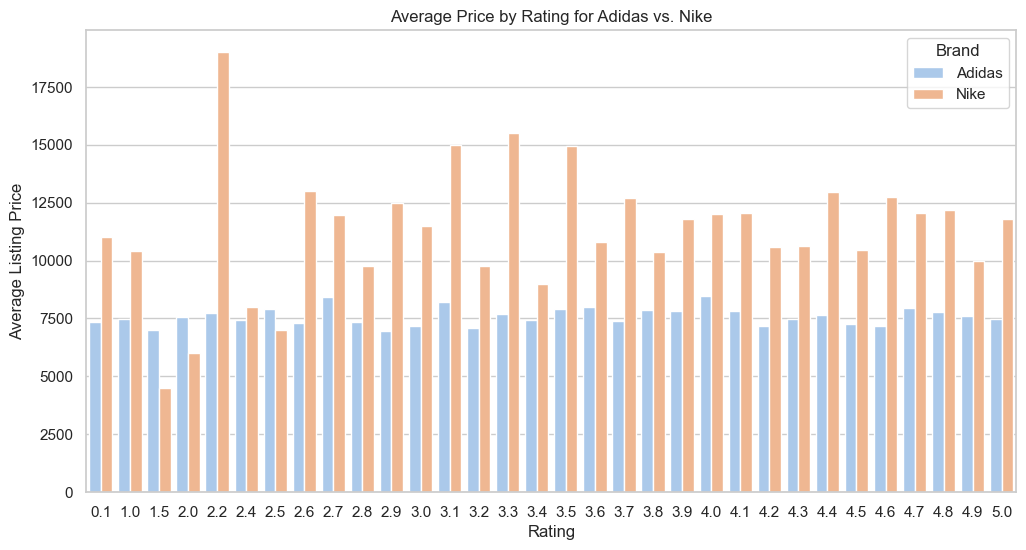

In [49]:
avg_price_by_rating = Copy_data.groupby(['Brand', 'Rating'])['Listing Price'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_rating, x='Rating', y='Listing Price', hue='Brand', palette='pastel')
plt.title("Average Price by Rating for Adidas vs. Nike")
plt.xlabel("Rating")
plt.ylabel("Average Listing Price")
plt.legend(title='Brand')
plt.show()

## A/B Testing - Comparing Adidas vs Nike Ratings

In [50]:
adidas_ratings = Copy_data[Copy_data['Brand'] == 'Adidas']['Rating']
nike_ratings = Copy_data[Copy_data['Brand'] == 'Nike']['Rating']


In [51]:
print(f"Adidas Ratings Count: {adidas_ratings.count()}")
print(f"Nike Ratings Count: {nike_ratings.count()}")

Adidas Ratings Count: 2625
Nike Ratings Count: 552


In [52]:
t_stat, p_value = ttest_ind(adidas_ratings, nike_ratings, equal_var=False)
print(f"A/B Test Results: t-statistic={t_stat:.4f}, p-value={p_value:.4f}")

A/B Test Results: t-statistic=5.9766, p-value=0.0000


## Regression Analysis - Factors Affecting Ratings

In [61]:
regression_data =Copy_data[['Rating', 'Listing Price', 'Discount', 'Brand']]
regression_data

,Rating,Listing Price,Discount,Brand
0,4.8,14999,50,Adidas
1,3.3,7599,50,Adidas
2,2.6,999,40,Adidas
3,4.1,6999,50,Adidas
4,3.5,7999,50,Adidas
...,...,...,...,...
3260,0.1,6495,0,Nike
3262,3.0,13995,0,Nike
3263,5.0,15995,0,Nike
3266,4.0,16995,0,Nike


In [ ]:
regression_data = pd.get_dummies(regression_data, columns=['Brand'], drop_first=True)

In [54]:
regression_data

,Rating,Listing Price,Discount,Brand_Nike
0,4.8,14999,50,False
1,3.3,7599,50,False
2,2.6,999,40,False
3,4.1,6999,50,False
4,3.5,7999,50,False
...,...,...,...,...
3260,0.1,6495,0,True
3262,3.0,13995,0,True
3263,5.0,15995,0,True
3266,4.0,16995,0,True


In [55]:

X = regression_data[['Listing Price', 'Discount', 'Brand_Nike']]
y = regression_data['Rating']

In [56]:
reg_model = LinearRegression()
reg_model.fit(X, y)

LinearRegression()

In [57]:

coefficients = dict(zip(X.columns, reg_model.coef_))

In [58]:


print("Regression Coefficients (Impact on Ratings):", coefficients)

Regression Coefficients (Impact on Ratings): {'Listing Price': 9.96922556097671e-06, 'Discount': -0.0019252231535421757, 'Brand_Nike': -0.6484162468389032}


/var/folders/g_/4y5h37m96h7gb1f4w331kclw0000gn/T/ipykernel_97458/1900311029.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(coefficients.keys()), y=list(coefficients.values()), palette="coolwarm")


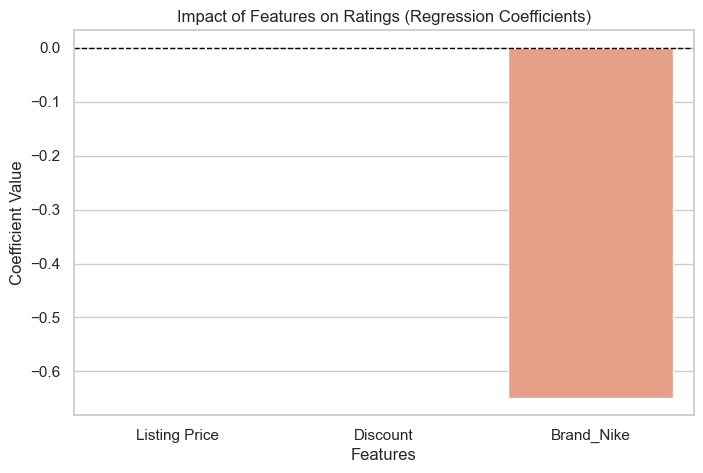

In [59]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(coefficients.keys()), y=list(coefficients.values()), palette="coolwarm")
plt.title("Impact of Features on Ratings (Regression Coefficients)")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.axhline(0, color='black', linewidth=1, linestyle="--")  # Add a reference line at y=0
plt.show()